In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import re
import os
from IPython.display import display, HTML
from classifier import Classifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
csv_name = 'LIS_2021-Phytoplankton_Final Report Data.xlsx - 2021 LIS phytoplankton count.csv'
classified = Classifier(csv_name)
year = re.search(r'\b(\d{4})\b', csv_name).group(1) if re.search(r'\b(\d{4})\b', csv_name) else 'Year not found'

In [29]:
def sort_mixoplankton_type_by_season(season):
    if season == 'Winter':
        months = ['January', 'February', 'March']
    elif season == 'Spring':
        months = ['April', 'May', 'June']
    elif season == 'Summer':
        months = ['July', 'August', 'September']
    elif season == 'Fall':
        months = ['October', 'November', 'December']
    else:
        raise ValueError(f"Invalid season: {season}. Valid options are: Winter, Spring, Summer, Fall")
    df = classified.add_multiheader(classified.mixoplankton)
    df = pd.concat([df.loc[:, df.columns.get_level_values(2).isin(['MFT'])], df.loc[:, df.columns.get_level_values(0).isin(months)]], axis=1)
    df = df.loc[~(df.loc[:, df.columns.get_level_values(0).isin(months)] == 0).all(axis=1)]
    df.columns = df.columns.get_level_values(1)
    df = pd.concat([df[[np.nan]], df.groupby(df.columns.str[0], axis=1).sum()], axis=1).rename(columns= {np.nan:'MFT'})
    df = df.groupby('MFT').sum().reset_index()
    df['Totals'] = df.iloc[:, 1:].sum(axis=1)
    df['Percentages'] = ((df['Totals'] / df['Totals'].sum()) * 100)
    return df

## What different types of mixoplankton are found by station every year (focus on summer/spring)?

In [30]:
csvs = sorted(os.listdir(f"{os.getcwd()}/inputs"))
for csv_name in csvs:
    # classify mixotrophs
    classified = Classifier(csv_name)
    
    # Get year
    year = re.search(r'\b(\d{4})\b', csv_name).group(1) if re.search(r'\b(\d{4})\b', csv_name) else 'Year not found'

    # Get table for each year
    display(HTML(f"<h2>Mixoplankton Functional Type in LIS in Summer of {year}</h2>"))
    display(sort_mixoplankton_type_by_season('Summer'))

,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1887556,1057408,690712,772904,551452,450208,494208,285956,488356,300476,6979236,99.791131
1,pSNCM,2904,4400,4400,0,0,2904,0,0,0,0,14608,0.208869


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,514800,1149412,968880,819720,499840,602800,378792,283800,83600,45408,5347052,99.754562
1,pSNCM,0,5852,5852,0,1452,0,0,0,0,0,13156,0.245438


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,639452,376904,708400,343156,107052,177452,189200,664356,0,86460,3292432,98.169844
1,pSNCM,11704,5808,5808,4356,10252,14652,0,8800,0,0,61380,1.830156


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1962400,3212704,1264252,956252,1088252,516956,651904,835966,285956,286660,11061302,99.925273
1,pSNCM,1452,704,2156,1452,0,0,0,1452,1056,0,8272,0.074727


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1148752,2011108,1259104,696652,1004652,381304,112156,153956,204160,145904,7117748,99.709686
1,pSNCM,704,3608,1408,352,1452,13200,0,0,0,0,20724,0.290314


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1009052,827112,1074260,652652,476652,500104,462176,381304,283140,151228,5817680,98.908580
1,eSNCM,0,0,0,0,0,0,30800,792,6028,176,37796,0.642584
2,pSNCM,3784,13200,1584,0,1452,5852,176,352,0,0,26400,0.448836


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1487200,1478444,1166704,912252,1776280,1682252,1255452,1307020,217140,164956,11447700,99.930480
1,eSNCM,0,0,0,0,0,0,0,0,0,1452,1452,0.012675
2,pSNCM,0,88,2904,2904,88,0,176,176,88,88,6512,0.056845


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1582812,1705704,1150204,818400,611908,792000,240504,363704,780208,37004,8082448,99.90917
1,pSNCM,704,2156,2904,1056,0,352,0,0,88,88,7348,0.09083


In [31]:
csvs = sorted(os.listdir(f"{os.getcwd()}/inputs"))
for csv_name in csvs:
    # classify mixotrophs
    classified = Classifier(csv_name)

    # Get year
    year = re.search(r'\b(\d{4})\b', csv_name).group(1) if re.search(r'\b(\d{4})\b', csv_name) else 'Year not found'

    # Get table for each year
    display(HTML(f"<h2>Mixoplankton Functional Type in LIS in Spring of {year}</h2>"))
    display(sort_mixoplankton_type_by_season('Spring'))

,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1739136,1999008,1506252,2230756,1865600,853512,2069018,1047156,1033956,852060,15196454,100.0


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1296504,1856800,1140480,833052,805200,1918356,645304,569052,768504,475200,10308452,100.0


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,668800,595452,302104,881452,92356,231704,121704,274252,180356,85052,3433232,99.324075
1,pSNCM,0,10252,4400,1452,1452,0,2904,1452,1452,0,23364,0.675925


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,978252,539704,427548,698104,582252,305052,363704,145156,594000,119416,4753188,99.90844
1,pSNCM,0,1452,2904,0,0,0,0,0,0,0,4356,0.09156


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,1201200,1118304,1633852,486156,528000,638704,563200,775104,262504,181852,7388876,98.975641
1,pSNCM,0,704,2904,704,0,704,0,704,0,352,6072,0.081336
2,pSNCM*,0,0,0,70400,0,0,0,0,0,0,70400,0.943024


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,888800,690756,447304,682000,632104,378708,425304,689304,461956,189904,5486140,99.996792
1,pSNCM,0,0,176,0,0,0,0,0,0,0,176,0.003208


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages


,MFT,A,B,C,D,E,F,H,I,J,K,Totals,Percentages
0,CM,836088,1584176,729256,476652,497552,536800,718564,520608,375012,141152,6415860,99.998628
1,pSNCM,88,0,0,0,0,0,0,0,0,0,88,0.001372


In [6]:
# Sort by station and S/B
by_station_SB = classified.add_multiheader(classified.mixoplankton)
species_columns = by_station_SB.columns.get_level_values(2).isin(['Phylum', 'Genus', 'Species', 'MFT', 'Evidence of mixoplankton activity', 'size class', 'Totals'])
by_station_SB = by_station_SB.loc[:, ~species_columns]
by_station_SB.columns = by_station_SB.columns.get_level_values(1)
by_station_SB = by_station_SB.groupby(by_station_SB.columns.str[:3], axis=1).sum()
totals_stationSB = by_station_SB.sum()
totals_stationSB = pd.DataFrame(totals_stationSB).reset_index().rename(columns={0: 'Totals', 'index': 'Station'})
totals_stationSB

,Station,Totals
0,A4B,867460
1,A4S,1906388
2,B3B,1293952
3,B3S,2325180
4,C1B,512204
5,C1S,1750672
6,D3B,727364
7,D3S,806256
8,E1B,955108
9,E1S,305360


## How do the number of mixoplankton from west to east change every year?

In [35]:
def mixoplankton_per_station():
    # Get year
    year = re.search(r'\b(\d{4})\b', csv_name).group(1) if re.search(r'\b(\d{4})\b', csv_name) else 'Year not found'
    
    # Remove Classification columns and groupby Station for entire year
    by_station = classified.pretty_without_totals 
    species_columns = by_station.columns.get_level_values(2).isin(['Phylum', 'Genus', 'Species', 'MFT', 'Evidence of mixoplankton activity', 'size class', 'Totals'])
    by_station = by_station.loc[:, ~species_columns]
    by_station.columns = by_station.columns.get_level_values(1)
    by_station = by_station.groupby(by_station.columns.str[0], axis=1).sum()
    totals_station = by_station.sum()
    totals_station = pd.DataFrame(totals_station).reset_index().rename(columns={0: 'Totals', 'index': 'Station'})

    # Get coordinates for each station and combine with dataframe with total mixoplankton for each station
    cord = pd.read_csv('LIS_CELLCOUNTS_2019_withStationLocations.xlsx - 2019.csv')
    cord = cord.fillna(0)
    cords = cord[['ST', 'lat', 'lon']].drop_duplicates()
    cords = pd.concat([totals_station, cords], axis=1).drop(['ST'], axis=1)
    lats = cords['lat'].tolist()
    lons = cords['lon'].tolist()
    x, y = (lons, lats)

    # Create Basemap and color bar
    fig, ax = plt.subplots(figsize=(10, 10))
        
    # Create a Basemap instance
    map = Basemap(projection='cyl', lon_0=-73, lat_0=41, llcrnrlat=40.7, urcrnrlat=41.3, llcrnrlon=-74, urcrnrlon=-72, resolution='f', ax=ax)
        
    # Add map features
    map.drawmapboundary()
    map.fillcontinents()
    map.drawcoastlines()
    map.drawparallels(np.arange(40.7, 41.3, .15), labels=[1, 1, 1, 1])
    map.drawmeridians(np.arange(-74, -72, .25), labels=[1, 1, 1, 1])
        
    # Scatter plot on the Basemap
    sc = map.scatter(x, y, c=cords['Totals'], s=100, cmap='rainbow', edgecolor='black', zorder=5)
        
    # Color Bar
    cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.25, aspect=8, pad=0.1) 
    cbar.set_ticks(np.linspace(cords['Totals'].min(), cords['Totals'].max(), 5))
    cbar.set_ticklabels([f'{tick:.0f}' for tick in (np.linspace(cords['Totals'].min(), cords['Totals'].max(), 5))])
        
    fig.suptitle(f'Mixoplankton {year}', fontsize=20, y=0.64)

    cords = cords.drop(['lat', 'lon'], axis=1).set_index('Station').transpose()
        
    return plt.show(), display(cords)

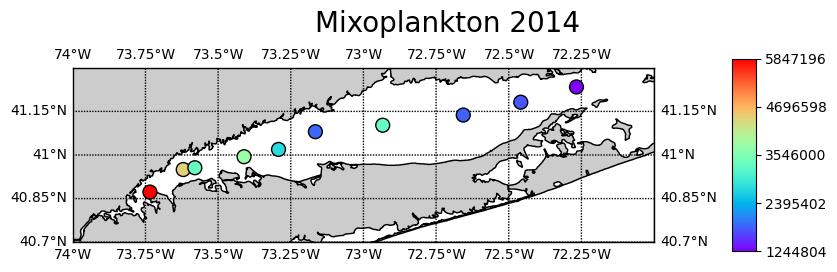

Station,A,B,C,D,E,F,H,I,J,K
Totals,5847196,4436520,3342416,3766312,2747844,1865336,3319982,1831104,1758372,1244804


(None, None)

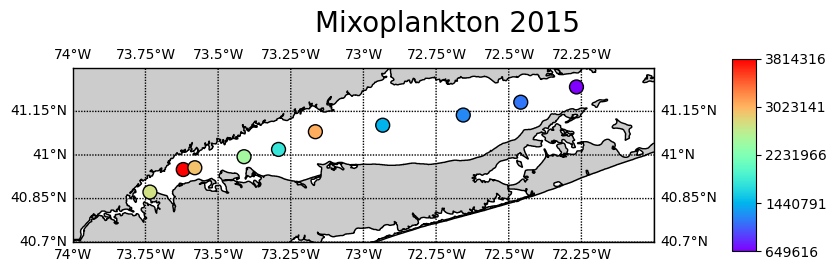

Station,A,B,C,D,E,F,H,I,J,K
Totals,2735304,3814316,2939464,2466772,1780196,3059408,1440600,1224740,1133044,649616


(None, None)

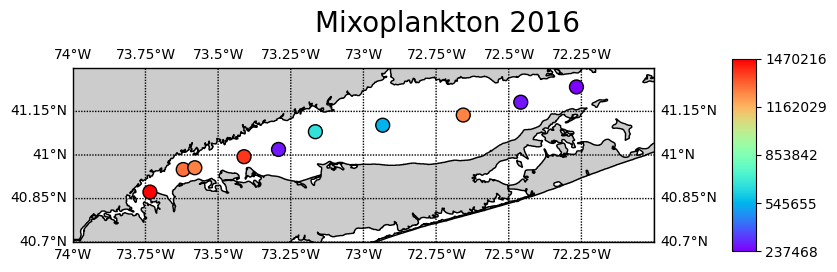

Station,A,B,C,D,E,F,H,I,J,K
Totals,1470216,1287572,1259720,1384284,275572,664312,545468,1253868,266860,237468


(None, None)

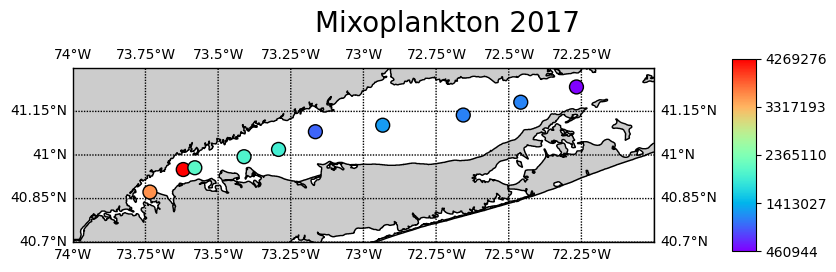

Station,A,B,C,D,E,F,H,I,J,K
Totals,3527216,4269276,2095720,2000416,1932876,962016,1261964,1115190,1118480,460944


(None, None)

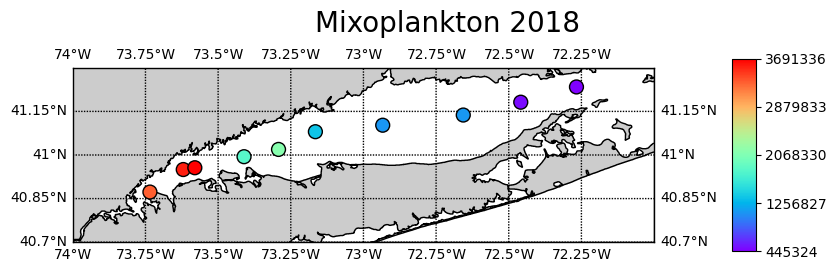

Station,A,B,C,D,E,F,H,I,J,K
Totals,3297932,3558192,3691336,1807740,2126560,1346400,1097624,1111528,486112,445324


(None, None)

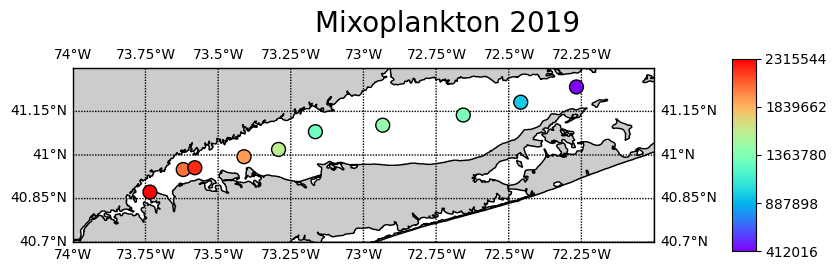

Station,A,B,C,D,E,F,H,I,J,K
Totals,2315544,2033988,2217512,1917388,1599972,1310584,1434268,1338480,964568,412016


(None, None)

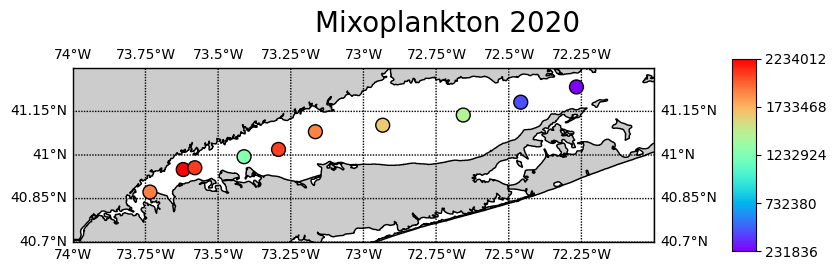

Station,A,B,C,D,E,F,H,I,J,K
Totals,1902428,2234012,2081860,1268608,2071828,1883552,1648988,1425820,428912,231836


(None, None)

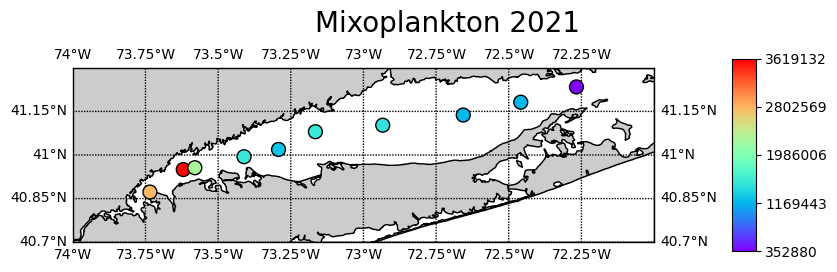

Station,A,B,C,D,E,F,H,I,J,K
Totals,2773848,3619132,2262876,1533620,1260468,1546072,1485616,1195920,1192224,352880


(None, None)

In [36]:
csvs = sorted(os.listdir(f"{os.getcwd()}/inputs"))
for csv_name in csvs:
    # classify mixotrophs
    classified = Classifier(csv_name)
    
    # Get map for each year
    display(mixoplankton_per_station())

In [125]:
# map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, epsg=5520)
# #http://server.arcgisonline.com/arcgis/rest/services

# map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
# plt.show()


In [3]:
# cord = pd.read_csv('LIS_CELLCOUNTS_2019_withStationLocations.xlsx - 2019.csv')
# cord = cord.fillna(0)
# cords = cord[['ST', 'lat', 'lon']].drop_duplicates()
# cords = pd.concat([totals_station, cords], axis=1).drop(['ST'], axis=1)
# lats = cords['lat'].tolist()
# lons = cords['lon'].tolist()
# x, y = (lons, lats)

# cords.sort_values(['Totals'], ascending=False)